# Import CSV files

## Import library

In [1]:
%pip install python-dotenv
%pip install seaborn


import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import psycopg2
import pandas as pd
from psycopg2 import sql
from sqlalchemy import create_engine, text
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Data

In [2]:
# Load environment variables
load_dotenv(override=True)

# Test if variables are loaded
db_host = os.getenv('DB_HOST')
db_name = os.getenv('DB_NAME')
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_port = os.getenv('DB_PORT')
database_url = os.getenv("DATABASE_URL")
secret_key = os.getenv("SECRET_KEY")
debug_mode = os.getenv("DEBUG")

# file path
supply_chain_file_path = "../resources/DataCoSupplyChainDataset.csv"
access_log_file_path = "../resources/tokenized_access_log_df.csv"

print("✓ Environment variables loaded:")
# print(f"DB_HOST: {os.getenv('DB_HOST')}")
# print(f"DB_NAME: {os.getenv('DB_NAME')}")
# print(f"DB_USER: {os.getenv('DB_USER')}")
# print(f"DB_PASSWORD: {os.getenv('DB_PASSWORD')}")
# print(f"DB_PORT: {os.getenv('DB_PORT')}")
# print(f"Database URL: {database_url}")
# print(f"Secret Key: {secret_key}")
# print(f"Debug Mode: {debug_mode}")

✓ Environment variables loaded:


## Create Tables and Import Data Using Python

In [3]:
conn_params = {
    'host':     db_host,
    'database': db_name,
    'user':     db_user,
    'password': db_password,
    'port':     db_port
}

try:
    conn = psycopg2.connect(**conn_params)
    conn.autocommit = True
    cursor = conn.cursor()
    # Create database
    cursor.execute("CREATE DATABASE final_project;")
    print("Database created successfully!")
    
except psycopg2.errors.DuplicateDatabase:
    print("Database already exists")

except Exception as e:
    print(f"Error: {e}")

# finally:
#     cursor.close()
#     conn.close()

Database already exists


## Create Tables & Import DataCoSupplyChainDataset

In [4]:
# Connect to your project database
conn_params['database'] = os.getenv('DB_NAME')

try:
    conn = psycopg2.connect(**conn_params)
    cursor = conn.cursor()
    
    # Create table with proper data types
    create_table_query = """
    CREATE TABLE IF NOT EXISTS supply_chain_df (
        type VARCHAR(50),
        days_for_shipping_real INTEGER,
        days_for_shipment_scheduled INTEGER,
        benefit_per_order NUMERIC(10,2),
        sales_per_customer NUMERIC(10,2),
        delivery_status VARCHAR(50),
        late_delivery_risk INTEGER,
        category_id INTEGER,
        category_name VARCHAR(100),
        customer_city VARCHAR(100),
        customer_country VARCHAR(100),
        customer_email VARCHAR(150),
        customer_fname VARCHAR(100),
        customer_id INTEGER,
        customer_lname VARCHAR(100),
        customer_password VARCHAR(100),
        customer_segment VARCHAR(50),
        customer_state VARCHAR(100),
        customer_street VARCHAR(200),
        customer_zipcode VARCHAR(20),
        department_id INTEGER,
        department_name VARCHAR(100),
        latitude NUMERIC(10,6),
        longitude NUMERIC(10,6),
        market VARCHAR(50),
        order_city VARCHAR(100),
        order_country VARCHAR(100),
        order_customer_id INTEGER,
        order_date DATE,
        order_id INTEGER PRIMARY KEY,
        order_item_cardprod_id INTEGER,
        order_item_discount NUMERIC(10,2),
        order_item_discount_rate NUMERIC(5,4),
        order_item_id INTEGER,
        order_item_product_price NUMERIC(10,2),
        order_item_profit_ratio NUMERIC(5,4),
        order_item_quantity INTEGER,
        sales NUMERIC(10,2),
        order_item_total NUMERIC(10,2),
        order_profit_per_order NUMERIC(10,2),
        order_region VARCHAR(50),
        order_state VARCHAR(100),
        order_status VARCHAR(50),
        order_zipcode VARCHAR(20),
        product_card_id INTEGER,
        product_category_id INTEGER,
        product_description TEXT,
        product_image VARCHAR(200),
        product_name VARCHAR(200),
        product_price NUMERIC(10,2),
        product_status INTEGER,
        shipping_date DATE,
        shipping_mode VARCHAR(50)
    );
    """
    
    cursor.execute(create_table_query)
    conn.commit()
    print("✓ Table created successfully!")
    
except Exception as e:
    print(f"Error: {e}")
    conn.rollback()
    
# finally:
#     cursor.close()
#     conn.close()


✓ Table created successfully!


In [43]:
conn = psycopg2.connect(**conn_params)
cur = conn.cursor()
query = "SELECT * FROM supply_chain_df;"
supply_chain_df = pd.read_sql_query(query, conn)
supply_chain_df.head()

/var/folders/yt/wnnkxst90pz1w0b5ww0xhh6r0000gn/T/ipykernel_5882/1500381521.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  supply_chain_df = pd.read_sql_query(query, conn)


,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_country,customer_email,customer_fname,customer_id,customer_lname,customer_password,customer_segment,customer_state,customer_street,customer_zipcode,department_id,department_name,latitude,longitude,market,order_city,order_country,order_customer_id,order_date_dateorders,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_region,order_state,order_status,order_zipcode,product_card_id,product_category_id,product_description,product_image,product_name,product_price,product_status,shipping_date_dateorders,shipping_mode
0,DEBIT,3,4,91.25,314.64,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.00,2,Fitness,18.25,-66.04,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.11,0.04,180517,327.75,0.29,1,327.75,314.64,91.25,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.09,311.36,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.00,2,Fitness,18.28,-66.04,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.39,0.05,179254,327.75,-0.80,1,327.75,311.36,-249.09,South Asia,Rajastán,PENDING,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.78,309.72,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,"95,125.00",2,Fitness,37.29,-121.88,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.03,0.06,179253,327.75,-0.80,1,327.75,309.72,-247.78,South Asia,Rajastán,CLOSED,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.86,304.81,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,"90,027.00",2,Fitness,34.13,-118.29,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.94,0.07,179252,327.75,0.08,1,327.75,304.81,22.86,Oceania,Queensland,COMPLETE,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.21,298.25,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.00,2,Fitness,18.25,-66.04,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.50,0.09,179251,327.75,0.45,1,327.75,298.25,134.21,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
for col in supply_chain_df.select_dtypes(include=['object']).columns:
    supply_chain_df[col] = supply_chain_df[col].str.lower()

supply_chain_df.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,order_zipcode,product_card_id,product_category_id,product_description,product_image,product_name,product_price,product_status,shipping_date_dateorders,shipping_mode
0,debit,3,4,91.250000,314.640015,advance shipping,0,73,sporting goods,caguas,...,None,1360,73,None,http://images.acmesports.sports/smart+watch,smart watch,327.75,0,2/3/2018 22:56,standard class
1,transfer,5,4,-249.089996,311.359985,late delivery,1,73,sporting goods,caguas,...,None,1360,73,None,http://images.acmesports.sports/smart+watch,smart watch,327.75,0,1/18/2018 12:27,standard class
2,cash,4,4,-247.779999,309.720001,shipping on time,0,73,sporting goods,san jose,...,None,1360,73,None,http://images.acmesports.sports/smart+watch,smart watch,327.75,0,1/17/2018 12:06,standard class
3,debit,3,4,22.860001,304.809998,advance shipping,0,73,sporting goods,los angeles,...,None,1360,73,None,http://images.acmesports.sports/smart+watch,smart watch,327.75,0,1/16/2018 11:45,standard class
4,payment,2,4,134.210007,298.250000,advance shipping,0,73,sporting goods,caguas,...,None,1360,73,None,http://images.acmesports.sports/smart+watch,smart watch,327.75,0,1/15/2018 11:24,standard class


## Create Tables & Import tokenized_access_logs

In [7]:
try:
    conn = psycopg2.connect(**conn_params)
    cursor = conn.cursor()
    
    # CREATE TABLE SQL statement
    create_table_sql = """
    CREATE TABLE IF NOT EXISTS access_log_df (
        product VARCHAR(200),
        category VARCHAR(100),
        date DATE,
        month VARCHAR(20),
        hour TIME,
        department VARCHAR(100),
        ip VARCHAR(50),
        url TEXT
    );
    """
    
    cursor.execute(create_table_sql)
    conn.commit()
    print("✓ Table created successfully!")
    
except Exception as e:
    print(f"Error: {e}")
    conn.rollback()
# finally:
#     cursor.close()
#     conn.close()


✓ Table created successfully!


In [8]:
query = "SELECT * FROM access_log_df;"
access_log_df = pd.read_sql_query(query, conn)
access_log_df.head()

/var/folders/yt/wnnkxst90pz1w0b5ww0xhh6r0000gn/T/ipykernel_5882/1076980134.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  access_log_df = pd.read_sql_query(query, conn)


,product,category,date,month,hour,department,ip,url
0,Nike Men's Free 5.0+ Running Shoe,cardio equipment,10/15/2017 22:23,Oct,22,footwear,9.130.98.41,/department/footwear/category/cardio%20equipme...
1,Hirzl Men's Hybrid Golf Glove,golf balls,10/15/2017 22:24,Oct,22,outdoors,193.29.122.80,/department/outdoors/category/golf%20balls/pro...
2,Nike Men's Dri-FIT Victory Golf Polo,women's apparel,10/15/2017 22:24,Oct,22,golf,172.67.202.188,/department/golf/category/women's%20apparel/pr...
3,Top Flite Women's 2017 XL Hybrid,golf apparel,10/15/2017 22:26,Oct,22,outdoors,44.98.65.56,/department/outdoors/category/golf%20apparel/p...
4,Top Flite Women's 2017 XL Hybrid,golf apparel,10/15/2017 22:26,Oct,22,outdoors,114.79.134.195,/department/outdoors/category/golf%20apparel/p...


In [9]:
access_log_df = pd.read_sql_query("SELECT * FROM access_log_df", conn)

for col in access_log_df.select_dtypes(include=['object']).columns:
    access_log_df[col] = access_log_df[col].str.lower()
access_log_df

/var/folders/yt/wnnkxst90pz1w0b5ww0xhh6r0000gn/T/ipykernel_5882/1489703877.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  access_log_df = pd.read_sql_query("SELECT * FROM access_log_df", conn)


,product,category,date,month,hour,department,ip,url
0,nike men's free 5.0+ running shoe,cardio equipment,10/15/2017 22:23,oct,22,footwear,9.130.98.41,/department/footwear/category/cardio%20equipme...
1,hirzl men's hybrid golf glove,golf balls,10/15/2017 22:24,oct,22,outdoors,193.29.122.80,/department/outdoors/category/golf%20balls/pro...
2,nike men's dri-fit victory golf polo,women's apparel,10/15/2017 22:24,oct,22,golf,172.67.202.188,/department/golf/category/women's%20apparel/pr...
3,top flite women's 2017 xl hybrid,golf apparel,10/15/2017 22:26,oct,22,outdoors,44.98.65.56,/department/outdoors/category/golf%20apparel/p...
4,top flite women's 2017 xl hybrid,golf apparel,10/15/2017 22:26,oct,22,outdoors,114.79.134.195,/department/outdoors/category/golf%20apparel/p...
...,...,...,...,...,...,...,...,...
469972,nike men's cj elite 2 td football cleat,men's footwear,10/15/2017 22:23,oct,22,apparel,211.116.222.164,/department/apparel/category/men's%20footwear/...
469973,adidas kids' rg iii mid football cleat,featured shops,10/15/2017 22:23,oct,22,apparel,9.130.98.41,/department/apparel/category/featured%20shops/...
469974,columbia men's pfg anchor tough t-shirt,shop by sport,10/15/2017 22:23,oct,22,golf,210.215.134.145,/department/golf/category/shop%20by%20sport/pr...
469975,adidas kids' rg iii mid football cleat,featured shops,10/15/2017 22:23,oct,22,apparel,4.6.224.189,/department/apparel/category/featured%20shops/...


In [37]:
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 200)

# Product Category Analyzation

In [11]:
join_sql = '''
SELECT 
    s.*, 
    a.product AS access_product, 
    a.category AS access_category
FROM supply_chain_df s
LEFT JOIN access_log_df a
    ON s.category_name = a.category;
'''
df_joined = pd.read_sql_query(join_sql, conn)
df_joined.head()


/var/folders/yt/wnnkxst90pz1w0b5ww0xhh6r0000gn/T/ipykernel_5882/1985582582.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_joined = pd.read_sql_query(join_sql, conn)


,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_country,customer_email,customer_fname,customer_id,customer_lname,customer_password,customer_segment,customer_state,customer_street,customer_zipcode,department_id,department_name,latitude,longitude,market,order_city,order_country,order_customer_id,order_date_dateorders,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_region,order_state,order_status,order_zipcode,product_card_id,product_category_id,product_description,product_image,product_name,product_price,product_status,shipping_date_dateorders,shipping_mode,access_product,access_category
0,TRANSFER,6,4,25.469999,97.959999,Late delivery,1,40,Accessories,Caguas,Puerto Rico,XXXXXXXXX,Mary,7190,Mckinney,XXXXXXXXX,Consumer,PR,7168 Emerald Field,725.0,6,Outdoors,18.286718,-66.370552,LATAM,Santa Ana,El Salvador,7190,1/22/2017 8:24,51540,905,2.0,0.02,128807,24.99,0.26,4,99.959999,97.959999,25.469999,Central America,Santa Ana,PENDING,NaN,905,40,None,http://images.acmesports.sports/Team+Golf+Texa...,Team Golf Texas Longhorns Putter Grip,24.99,0,1/28/2017 8:24,Standard Class,None,None
1,TRANSFER,2,4,20.870001,43.480000,Advance shipping,0,40,Accessories,Caguas,Puerto Rico,XXXXXXXXX,Mary,9526,Patrick,XXXXXXXXX,Consumer,PR,9503 Hazy Pine Edge,725.0,6,Outdoors,18.206318,-66.370560,Pacific Asia,Angeles City,Filipinas,9526,1/25/2016 18:11,26701,906,6.5,0.13,66866,24.99,0.48,2,49.980000,43.480000,20.870001,Southeast Asia,Luzón Central,PENDING,NaN,906,40,None,http://images.acmesports.sports/Team+Golf+Tenn...,Team Golf Tennessee Volunteers Putter Grip,24.99,0,1/27/2016 18:11,Standard Class,None,None
2,TRANSFER,3,4,13.810000,42.480000,Advance shipping,0,40,Accessories,Caguas,Puerto Rico,XXXXXXXXX,Mary,2214,Smith,XXXXXXXXX,Consumer,PR,6567 Red Sky Gate,725.0,6,Outdoors,18.272530,-66.370598,Pacific Asia,Bagdad,Irak,2214,10/13/2016 6:58,44617,893,7.5,0.15,111398,24.99,0.33,2,49.980000,42.480000,13.810000,West Asia,Bagdad,PENDING,NaN,893,40,None,http://images.acmesports.sports/Team+Golf+Pitt...,Team Golf Pittsburgh Steelers Putter Grip,24.99,0,10/16/2016 6:58,Standard Class,None,None
3,DEBIT,3,4,16.990000,99.959999,Advance shipping,0,40,Accessories,Tucson,EE. UU.,XXXXXXXXX,Mary,6014,Washington,XXXXXXXXX,Home Office,AZ,4411 Cinder Front,85706.0,6,Outdoors,32.148449,-110.922852,Europe,Tournefeuille,Francia,6014,8/16/2015 22:58,15617,886,0.0,0.00,39046,24.99,0.17,4,99.959999,99.959999,16.990000,Western Europe,Languedoc-Rosellón-Mediodía-Pirineos,COMPLETE,NaN,886,40,None,http://images.acmesports.sports/Team+Golf+San+...,Team Golf San Francisco Giants Putter Grip,24.99,0,8/19/2015 22:58,Standard Class,None,None
4,DEBIT,3,4,-15.620000,71.970001,Advance shipping,0,40,Accessories,Chicago,EE. UU.,XXXXXXXXX,Kathryn,10192,Smith,XXXXXXXXX,Home Office,IL,7894 Old Circle,60614.0,6,Outdoors,41.984505,-87.823250,USCA,Brentwood,Estados Unidos,10192,7/11/2016 15:30,38202,886,3.0,0.04,95369,24.99,-0.22,3,74.970001,71.970001,-15.620000,West of USA,California,COMPLETE,94513.0,886,40,None,http://images.acmesports.sports/Team+Golf+San+...,Team Golf San Francisco Giants Putter Grip,24.99,0,7/14/2016 15:30,Standard Class,None,None


In [12]:
engine = create_engine(database_url)
conn = engine.connect()

In [13]:
# join = """
#     SELECT *
#     FROM  supply_chain_df s
#     LEFT JOIN access_log_df a
#     ON s.category_lower = a.category
#     LIMIT 10;
#     """
# df_joined = pd.read_sql_query(join, conn)
# df_joined

### Top/Worst sales by category

In [57]:
category_sales = (
    supply_chain_df.groupby('category_name')['sales']
    .sum().reset_index().sort_values('sales', ascending=False)
)
category_sales


,category_name,sales
18,Fishing,"6,929,653.69"
12,Cleats,"4,431,942.78"
9,Camping & Hiking,"4,118,425.57"
10,Cardio Equipment,"3,694,843.20"
47,Women's Apparel,"3,147,800.00"
46,Water Sports,"3,113,844.68"
34,Men's Footwear,"2,891,757.66"
30,Indoor/Outdoor Games,"2,888,993.91"
38,Shop By Sport,"1,309,522.04"
13,Computers,"663,000.00"


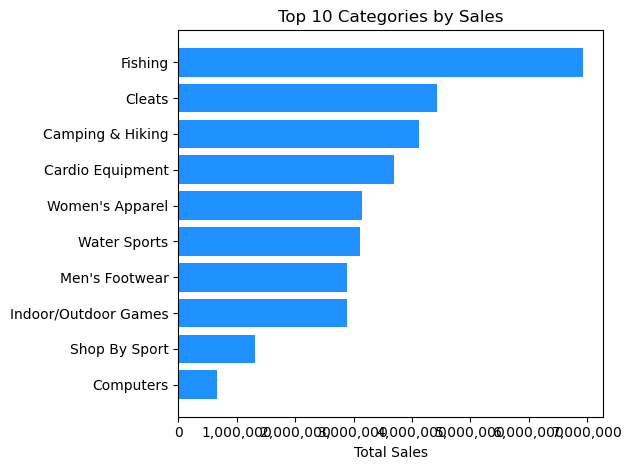

           category_name  total_sales  order_count  page_views
18               Fishing 6,929,653.69        17325        0.00
12                Cleats 4,431,942.78        24551        0.00
8       Camping & Hiking 4,118,425.57        13729        0.00
9       Cardio Equipment 3,694,843.20        12487        0.00
47       Women's Apparel 3,147,800.00        21035        0.00
46          Water Sports 3,113,844.68        15540        0.00
34        Men's Footwear 2,891,757.66        22246        0.00
30  Indoor/Outdoor Games 2,888,993.91        19298        0.00
38         Shop By Sport 1,309,522.04        10984        0.00
13             Computers   663,000.00          442        0.00


In [14]:
# Aggregate sales by product category (from supply_chain_df)
supply_agg = pd.read_sql_query("""
    SELECT 
        category_name, 
        SUM(sales) as total_sales, 
        COUNT(*) as order_count
    FROM supply_chain_df
    GROUP BY category_name
""", conn)

# Aggregate access logs by category
access_agg = pd.read_sql_query("""
    SELECT 
        category AS category_name, 
        COUNT(*) as page_views
    FROM access_log_df
    GROUP BY category
""", conn)

# Merge and analyze
category_summary = pd.merge(supply_agg, access_agg, how='left', on='category_name').fillna(0)

# Top 10 categories by sales
top_10 = category_summary.sort_values('total_sales', ascending=False).head(10)

# Visualization example:
plt.barh(top_10['category_name'], top_10['total_sales'], color='dodgerblue')
plt.xlabel('Total Sales')
plt.title('Top 10 Categories by Sales')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()

pd.options.display.float_format = '{:,.2f}'.format
print(top_10)


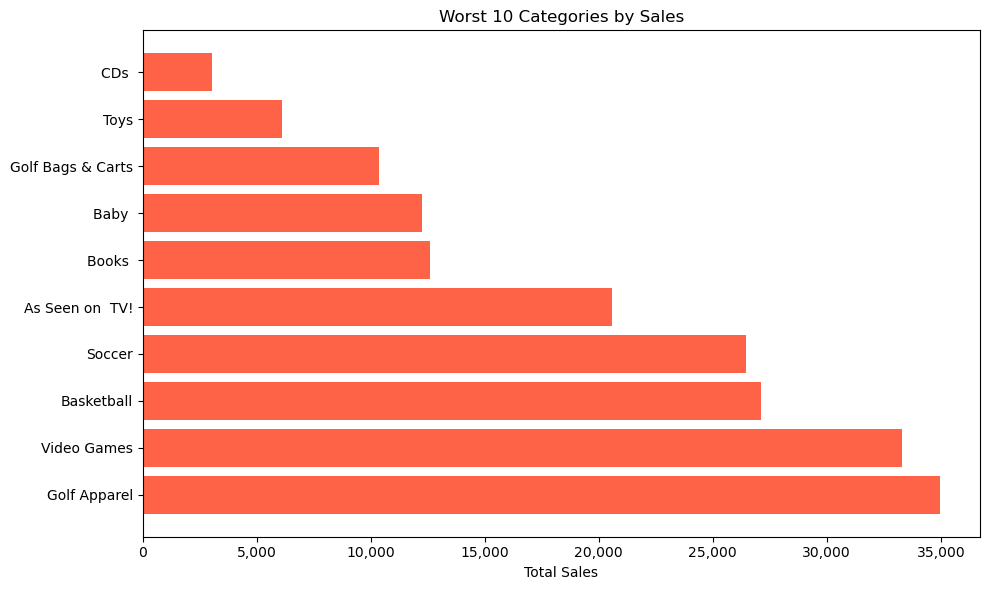

        category_name  total_sales  order_count  page_views
10               CDs      3,059.59          271        0.00
43               Toys     6,104.66          529        0.00
23  Golf Bags & Carts    10,369.39           61        0.00
2               Baby     12,229.56          207        0.00
5              Books     12,587.40          405        0.00
1     As Seen on  TV!    20,597.94           68        0.00
39             Soccer    26,477.05          138        0.00
4          Basketball    27,099.33           67        0.00
45        Video Games    33,310.50          838        0.00
22       Golf Apparel    34,969.75          441        0.00


In [15]:
# Aggregate: Worst 10
worst_10 = category_summary.sort_values('total_sales', ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.barh(worst_10['category_name'], worst_10['total_sales'], color='tomato')
plt.xlabel('Total Sales')
plt.title('Worst 10 Categories by Sales')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()


print(worst_10)


### Top 10 Categories by Order Count

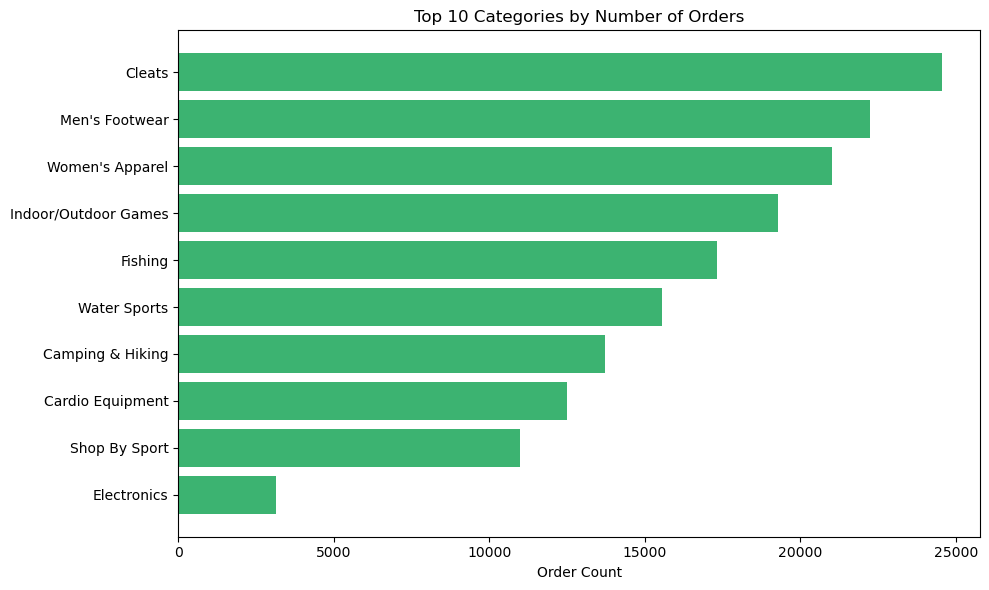

           category_name  total_sales  order_count  page_views
12                Cleats 4,431,942.78        24551        0.00
34        Men's Footwear 2,891,757.66        22246        0.00
47       Women's Apparel 3,147,800.00        21035        0.00
30  Indoor/Outdoor Games 2,888,993.91        19298        0.00
18               Fishing 6,929,653.69        17325        0.00
46          Water Sports 3,113,844.68        15540        0.00
8       Camping & Hiking 4,118,425.57        13729        0.00
9       Cardio Equipment 3,694,843.20        12487        0.00
38         Shop By Sport 1,309,522.04        10984        0.00
17           Electronics   371,034.64         3156        0.00


In [16]:
top_orders = category_summary.sort_values('order_count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_orders['category_name'], top_orders['order_count'], color='mediumseagreen')
plt.xlabel('Order Count')
plt.title('Top 10 Categories by Number of Orders')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(top_orders)



# Sales vs department

In [17]:
print('\n== SUPPLY CHAIN ==')
query = """
    SELECT DISTINCT department_name
    FROM supply_chain_df;
    """
department_name_df = pd.read_sql_query(query, conn)
print(department_name_df)

print('\n == ACCESS LOGS ==')
query = "SELECT DISTINCT department FROM access_log_df;"
access_log_df = pd.read_sql_query(query, conn)
print(access_log_df)


== SUPPLY CHAIN ==
       department_name
0           Discs Shop
1           Technology
2             Pet Shop
3              Fitness
4             Footwear
5   Health and Beauty 
6            Book Shop
7              Apparel
8             Fan Shop
9                 Golf
10            Outdoors

 == ACCESS LOGS ==
  department
0   apparel 
1  fan shop 
2      golf 
3   fitness 
4  outdoors 
5  footwear 


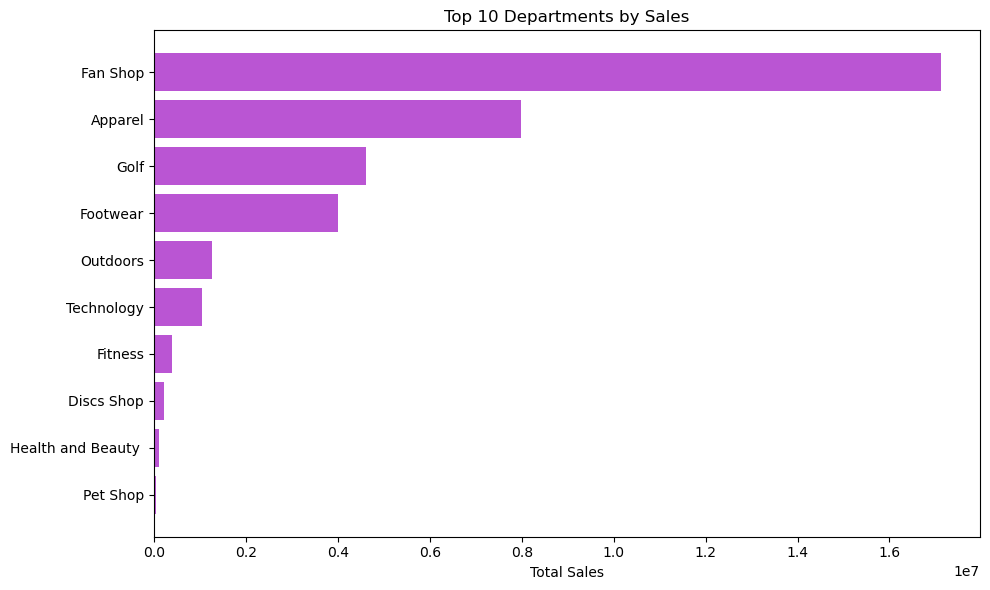

       department_name   total_sales  order_count
3             Fan Shop 17,113,870.94        66861
0              Apparel  7,976,255.34        48998
6                 Golf  4,609,028.24        33220
5             Footwear  4,006,498.77        14525
8             Outdoors  1,253,351.45         9686
10          Technology  1,039,598.97         1465
4              Fitness    397,050.89         2479
2           Discs Shop    228,887.73         2026
7   Health and Beauty     106,080.48          362
9             Pet Shop     41,524.80          492


In [20]:
dept_summary = (
    df_joined.groupby('department_name')
    .agg(total_sales=('sales', 'sum'), order_count=('order_id', 'count'))
    .reset_index()
)

plt.figure(figsize=(10, 6))
plt.barh(dept_summary.sort_values('total_sales', ascending=False)['department_name'].head(10), 
         dept_summary.sort_values('total_sales', ascending=False)['total_sales'].head(10), 
         color='mediumorchid')
plt.xlabel('Total Sales')
plt.title('Top 10 Departments by Sales')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(dept_summary.sort_values('total_sales', ascending=False).head(10))

# NOTE:
# This chart visualizes department-level sales, ranked Top 10.


In [41]:
dept_to_categories = (
    df_joined.groupby('department_name')['category_name']
    .unique()
    .reset_index()
)

pd.DataFrame(dept_to_categories)



,department_name,category_name
0,Apparel,"[Baby , Children's Clothing, Cleats, Crafts, Men's Clothing, Men's Footwear, Women's Clothing]"
1,Book Shop,[Books ]
2,Discs Shop,"[CDs , DVDs, Music, Video Games]"
3,Fan Shop,"[Camping & Hiking, Fishing, Hunting & Shooting, Indoor/Outdoor Games, Toys, Water Sports]"
4,Fitness,"[Baseball & Softball, Basketball, Hockey, Lacrosse, Soccer, Tennis & Racquet, Sporting Goods]"
5,Footwear,"[As Seen on TV!, Boxing & MMA, Cardio Equipment, Electronics, Fitness Accessories, Strength Training]"
6,Golf,"[Girls' Apparel, Shop By Sport, Women's Apparel]"
7,Health and Beauty,[Health and Beauty]
8,Outdoors,"[Accessories, Electronics, Garden, Golf Apparel, Golf Bags & Carts, Golf Balls, Golf Gloves, Golf Shoes, Kids' Golf Clubs, Men's Golf Clubs, Trade-In, Women's Golf Clubs]"
9,Pet Shop,[Pet Supplies]


# Sales vs Products

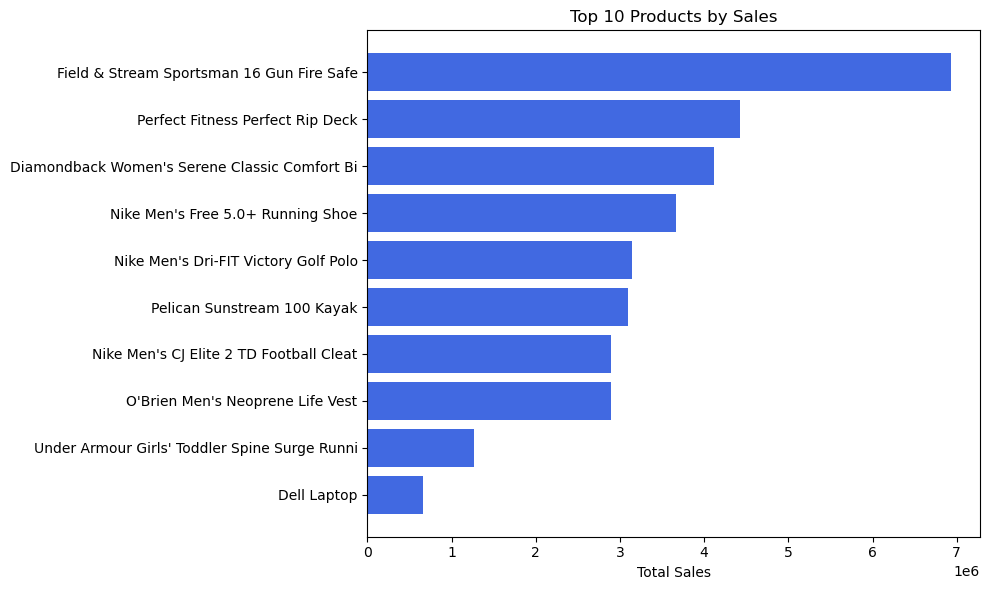

,product_name,category_name,department_name,total_sales,order_count
24,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,"6,929,653.69",17325
71,Perfect Fitness Perfect Rip Deck,Cleats,Apparel,"4,421,143.14",24515
21,Diamondback Women's Serene Classic Comfort Bi,Camping & Hiking,Fan Shop,"4,118,425.57",13729
61,Nike Men's Free 5.0+ Running Shoe,Cardio Equipment,Footwear,"3,667,633.20",12169
59,Nike Men's Dri-FIT Victory Golf Polo,Women's Apparel,Golf,"3,147,800.00",21035
70,Pelican Sunstream 100 Kayak,Water Sports,Fan Shop,"3,099,845.09",15500
56,Nike Men's CJ Elite 2 TD Football Cleat,Men's Footwear,Apparel,"2,891,757.66",22246
67,O'Brien Men's Neoprene Life Vest,Indoor/Outdoor Games,Fan Shop,"2,888,993.91",19298
102,Under Armour Girls' Toddler Spine Surge Runni,Shop By Sport,Golf,"1,269,082.67",10617
18,Dell Laptop,Computers,Technology,"663,000.00",442


In [48]:
product_summary = (
    supply_chain_df
    .groupby(['product_name', 'category_name', 'department_name'])
    .agg(total_sales=('sales', 'sum'), order_count=('order_id', 'count'))
    .reset_index()
    .sort_values('total_sales', ascending=False)
)

top10_products = product_summary.head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top10_products['product_name'], top10_products['total_sales'], color='royalblue')
plt.xlabel('Total Sales')
plt.title('Top 10 Products by Sales')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

pd.DataFrame(top10_products)



# Comparing

           category_name  avg_shipping_days  total_sales
0            Accessories               3.50   133,671.51
1        As Seen on  TV!               3.63    20,597.94
2                  Baby                3.15    12,229.56
3    Baseball & Softball               3.47    94,057.15
4             Basketball               3.46    27,099.33
5                 Books                3.39    12,587.40
6           Boxing & MMA               3.47    85,205.41
7                   CDs                3.45     3,059.59
8               Cameras                3.34   267,607.69
9       Camping & Hiking               3.50 4,118,425.57
10      Cardio Equipment               3.50 3,694,843.20
11   Children's Clothing               3.61   232,829.20
12                Cleats               3.51 4,431,942.78
13             Computers               3.62   663,000.00
14  Consumer Electronics               3.43   108,991.28
15                Crafts               3.58   223,356.33
16                  DVDs       

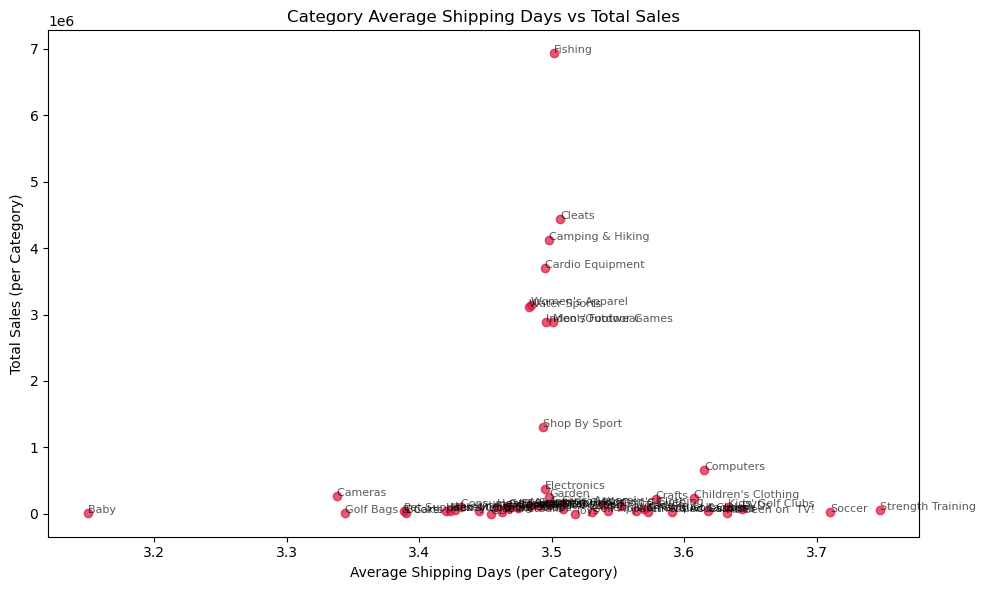

In [62]:
category_shipping_sales = (
    supply_chain_df.groupby('category_name')
    .agg(avg_shipping_days=('days_for_shipping_real', 'mean'),
         total_sales=('sales', 'sum'))
    .reset_index()
)

print(category_shipping_sales)

plt.figure(figsize=(10,6))
plt.scatter(category_shipping_sales['avg_shipping_days'], category_shipping_sales['total_sales'], color='crimson', alpha=0.7)
for idx, row in category_shipping_sales.iterrows():
    plt.text(row['avg_shipping_days'], row['total_sales'], row['category_name'], fontsize=8, alpha=0.65)
plt.xlabel('Average Shipping Days (per Category)')
plt.ylabel('Total Sales (per Category)')
plt.title('Category Average Shipping Days vs Total Sales')
plt.tight_layout()
plt.show()

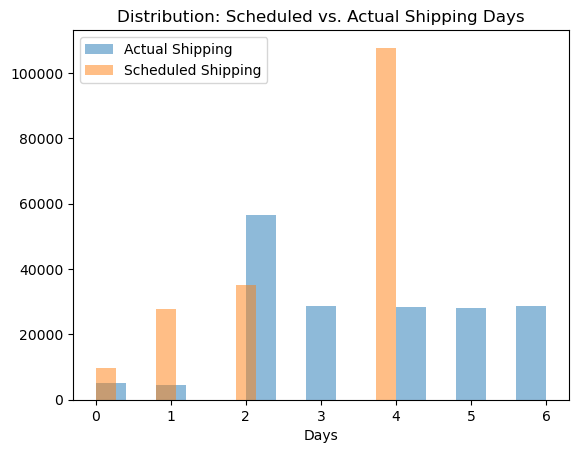

In [49]:
plt.hist(supply_chain_df['days_for_shipping_real'], bins=15, alpha=0.5, label='Actual Shipping')
plt.hist(supply_chain_df['days_for_shipment_scheduled'], bins=15, alpha=0.5, label='Scheduled Shipping')
plt.legend()
plt.xlabel('Days')
plt.title('Distribution: Scheduled vs. Actual Shipping Days')
plt.show()


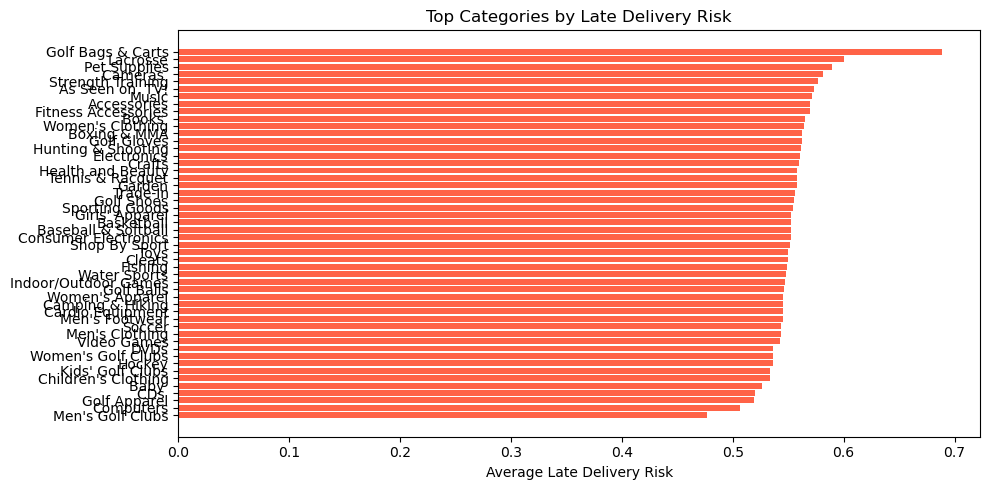

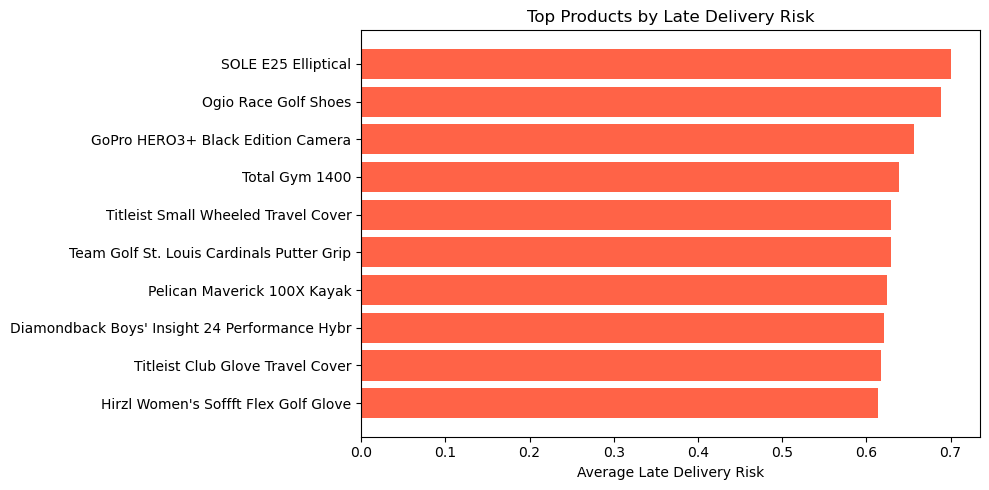

In [51]:
# カテゴリごとの遅延リスク平均
late_category = (
    supply_chain_df.groupby('category_name')['late_delivery_risk']
    .mean().sort_values(ascending=False).reset_index()
)

plt.figure(figsize=(10,5))
plt.barh(late_category['category_name'], late_category['late_delivery_risk'], color='tomato')
plt.xlabel('Average Late Delivery Risk')
plt.title('Top Categories by Late Delivery Risk')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 商品ごと
late_product = (
    supply_chain_df.groupby('product_name')['late_delivery_risk']
    .mean().sort_values(ascending=False).head(10).reset_index()
)

plt.figure(figsize=(10,5))
plt.barh(late_product['product_name'], late_product['late_delivery_risk'], color='tomato')
plt.xlabel('Average Late Delivery Risk')
plt.title('Top Products by Late Delivery Risk')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


2. Profit Ranking: High and Low Profit Products

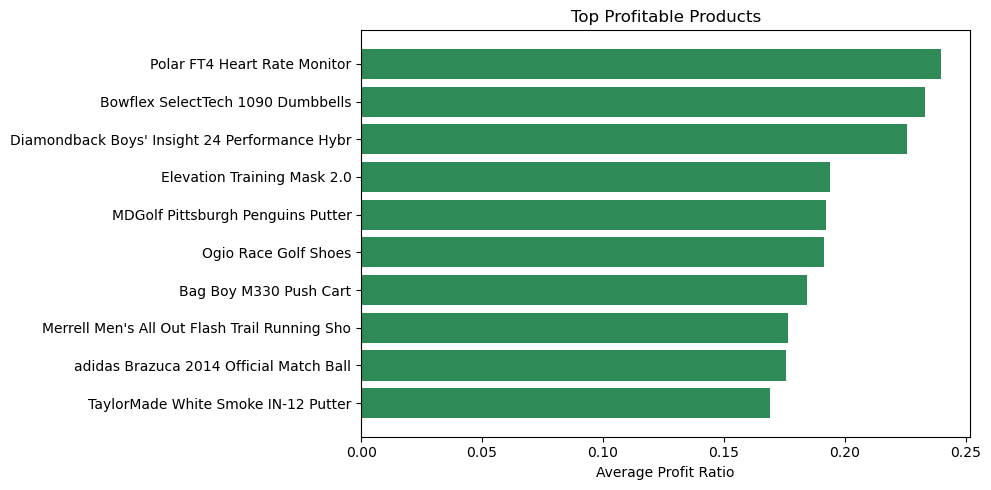

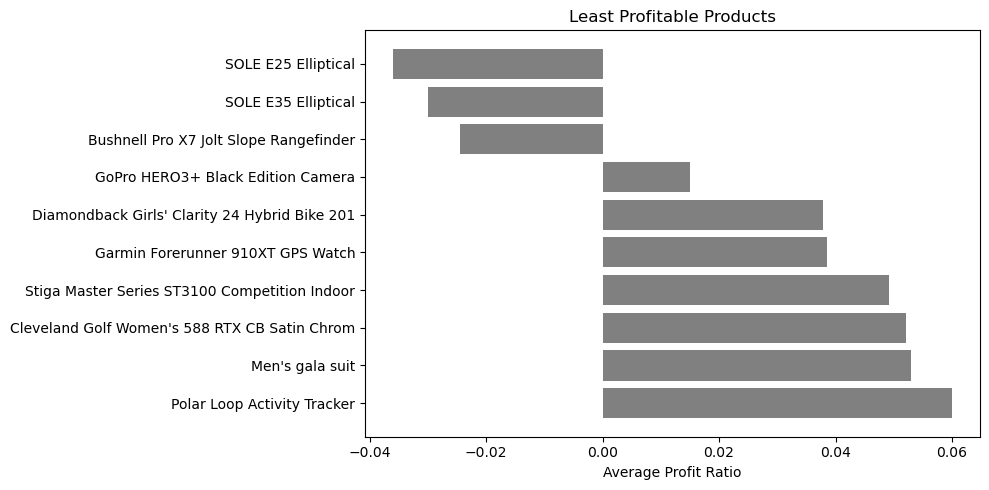

In [52]:
profit_product = (
    supply_chain_df.groupby('product_name')['order_item_profit_ratio']
    .mean().reset_index()
)

# High profit
top_profit = profit_product.sort_values('order_item_profit_ratio', ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.barh(top_profit['product_name'], top_profit['order_item_profit_ratio'], color='seagreen')
plt.xlabel('Average Profit Ratio')
plt.title('Top Profitable Products')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Low profit
low_profit = profit_product.sort_values('order_item_profit_ratio').head(10)
plt.figure(figsize=(10,5))
plt.barh(low_profit['product_name'], low_profit['order_item_profit_ratio'], color='gray')
plt.xlabel('Average Profit Ratio')
plt.title('Least Profitable Products')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



3. Orders by Country

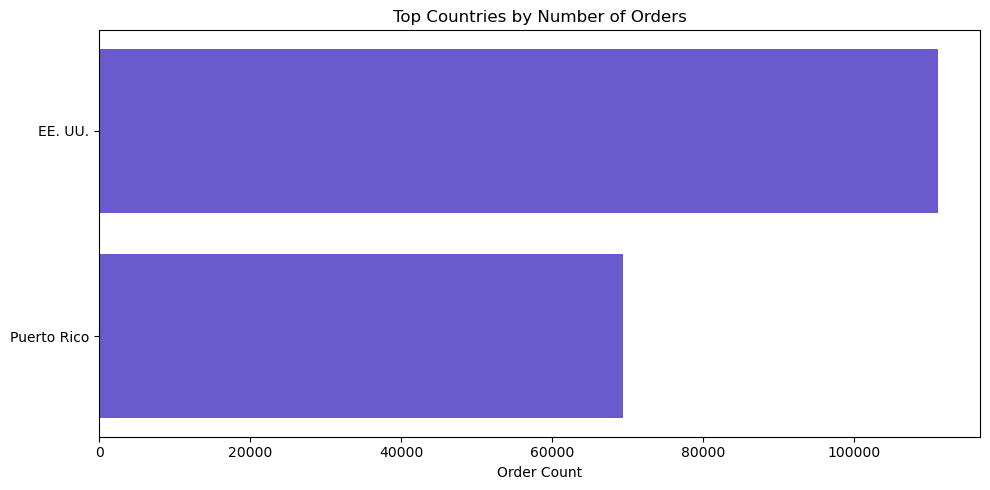

In [55]:
country_orders = (
    supply_chain_df.groupby('customer_country')['order_id']
    .count().sort_values(ascending=False).head(10).reset_index()
)

plt.figure(figsize=(10,5))
plt.barh(country_orders['customer_country'], country_orders['order_id'], color='slateblue')
plt.xlabel('Order Count')
plt.title('Top Countries by Number of Orders')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



4. Sales & Profit Distribution by Discount Rate

In [58]:
category_avg_discount = (
    supply_chain_df.groupby('category_name')['order_item_discount_rate']
    .mean().reset_index().sort_values('order_item_discount_rate', ascending=False)
)
print(category_avg_discount)


           category_name  order_item_discount_rate
1        As Seen on  TV!                      0.11
26            Golf Shoes                      0.11
41     Strength Training                      0.11
29    Hunting & Shooting                      0.10
2                  Baby                       0.10
0            Accessories                      0.10
6           Boxing & MMA                      0.10
3    Baseball & Softball                      0.10
33        Men's Clothing                      0.10
19   Fitness Accessories                      0.10
44              Trade-In                      0.10
40        Sporting Goods                      0.10
5                 Books                       0.10
32              Lacrosse                      0.10
25           Golf Gloves                      0.10
42      Tennis & Racquet                      0.10
13             Computers                      0.10
45           Video Games                      0.10
48      Women's Clothing       

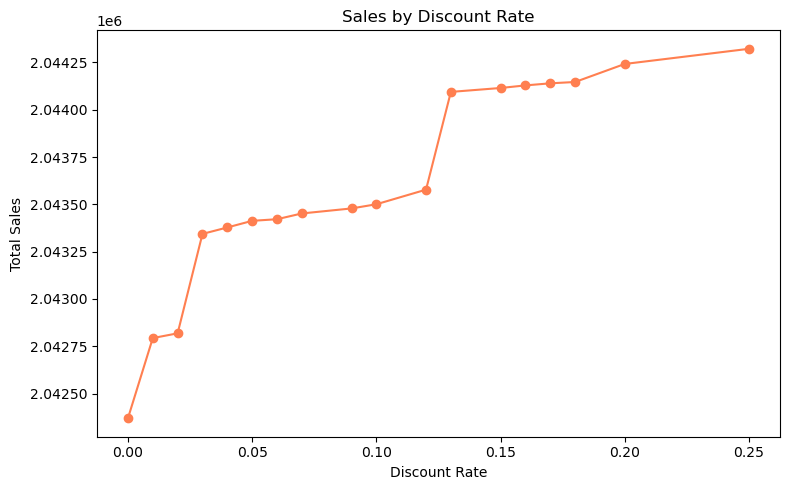

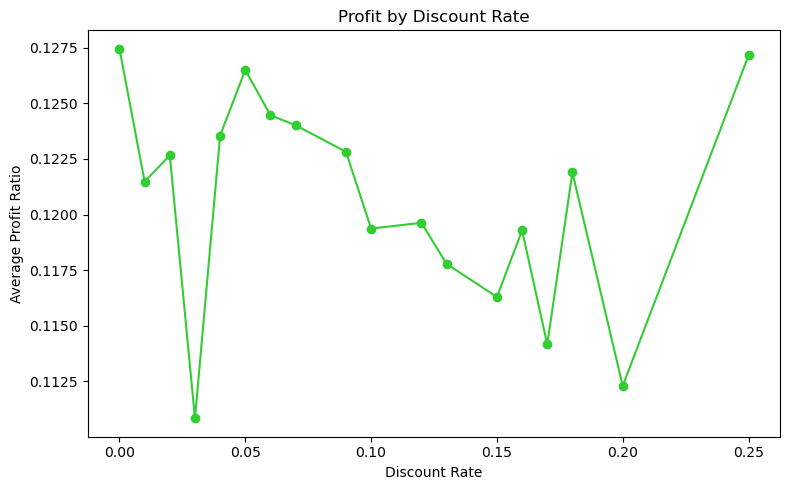

In [54]:
discount_summary = (
    supply_chain_df.groupby('order_item_discount_rate')
    .agg(total_sales=('sales', 'sum'), avg_profit=('order_item_profit_ratio', 'mean'))
    .reset_index()
)

plt.figure(figsize=(8,5))
plt.plot(discount_summary['order_item_discount_rate'], discount_summary['total_sales'], marker='o', color='coral', label='Total Sales')
plt.xlabel('Discount Rate')
plt.ylabel('Total Sales')
plt.title('Sales by Discount Rate')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(discount_summary['order_item_discount_rate'], discount_summary['avg_profit'], marker='o', color='limegreen', label='Average Profit')
plt.xlabel('Discount Rate')
plt.ylabel('Average Profit Ratio')
plt.title('Profit by Discount Rate')
plt.tight_layout()
plt.show()
